# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
latitude_longitude = []
cities = []

# Create a set of random lat and lng combinations
latitudes = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
longitudes = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
latitude_longitudes = zip(latitudes, longitudes)

# Identify nearest city for each lat, lng combination
for latitude_longitude in latitude_longitudes:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
country = []
city_name = []
city_id = []
latitude = []
longitude = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = base_url + "appid=" + weather_api_key + "&units=imperial&q="


#Loop through the list of 550 random cities to store their details into the lists
for index, city in enumerate(cities): 
    
    if len(city_id) < 550:
        try:
            response = requests.get(query_url + city).json()
            id = response["id"]
            name = response["name"]
            print(f"Count: {index}, City ID: {id}, City Name: {name}")
            country.append(response["sys"]["country"])
            city_name.append(response["name"])
            city_id.append(response["id"])
            latitude.append(response["coord"]["lat"])
            longitude.append(response["coord"]["lon"])
            temp.append(response["main"]["temp"])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            wind_speed.append(response["wind"]["speed"])
        except(KeyError, IndexError):
            pass
        

Count: 0, City ID: 3833367, City Name: Ushuaia
Count: 1, City ID: 2206939, City Name: Bluff
Count: 3, City ID: 2074865, City Name: Carnarvon
Count: 5, City ID: 5282297, City Name: Bethel
Count: 6, City ID: 3530691, City Name: Chunhuhub
Count: 7, City ID: 3430863, City Name: Mar del Plata
Count: 8, City ID: 546105, City Name: Nikolskoye
Count: 9, City ID: 5882953, City Name: Aklavik
Count: 10, City ID: 2155415, City Name: New Norfolk
Count: 11, City ID: 4030556, City Name: Rikitea
Count: 12, City ID: 3874787, City Name: Punta Arenas
Count: 13, City ID: 2075265, City Name: Busselton
Count: 14, City ID: 4032243, City Name: Vaini
Count: 15, City ID: 3450909, City Name: Rondonópolis
Count: 16, City ID: 6201424, City Name: Mataura
Count: 18, City ID: 933995, City Name: Souillac
Count: 19, City ID: 2126123, City Name: Chokurdakh
Count: 20, City ID: 2638520, City Name: Sanquhar
Count: 21, City ID: 2645826, City Name: Kendal
Count: 22, City ID: 3466704, City Name: Castro
Count: 23, City ID: 510

Count: 187, City ID: 2856500, City Name: Osterholz-Scharmbeck
Count: 188, City ID: 3374210, City Name: São Filipe
Count: 190, City ID: 934649, City Name: Cap Malheureux
Count: 191, City ID: 1529484, City Name: Kumul
Count: 192, City ID: 1214488, City Name: Meulaboh
Count: 193, City ID: 105298, City Name: Jizan
Count: 194, City ID: 1510689, City Name: Baykit
Count: 195, City ID: 4020109, City Name: Atuona
Count: 196, City ID: 2610806, City Name: Vágur
Count: 198, City ID: 5134295, City Name: Rome
Count: 199, City ID: 3457566, City Name: Mascote
Count: 200, City ID: 286987, City Name: Nizwá
Count: 201, City ID: 701802, City Name: Markova
Count: 202, City ID: 3354077, City Name: Opuwo
Count: 203, City ID: 686090, City Name: Asău
Count: 204, City ID: 964420, City Name: Port Elizabeth
Count: 205, City ID: 1185262, City Name: Bherāmāra
Count: 206, City ID: 3584003, City Name: Puerto El Triunfo
Count: 208, City ID: 3470338, City Name: Bataiporã
Count: 209, City ID: 1254046, City Name: Tura
Co

Count: 369, City ID: 1637001, City Name: Biak
Count: 370, City ID: 5786882, City Name: Bellevue
Count: 371, City ID: 3423146, City Name: Ilulissat
Count: 373, City ID: 1264976, City Name: Leh
Count: 374, City ID: 2338660, City Name: Yaan
Count: 375, City ID: 5954718, City Name: Flin Flon
Count: 377, City ID: 3522526, City Name: Nuevo Progreso
Count: 378, City ID: 2022174, City Name: Khurba
Count: 379, City ID: 6156307, City Name: Stettler
Count: 380, City ID: 1849892, City Name: Tottori-shi
Count: 382, City ID: 508362, City Name: Podgornoye
Count: 383, City ID: 1495626, City Name: Pangody
Count: 384, City ID: 1161724, City Name: Chabahar
Count: 385, City ID: 359796, City Name: Suez
Count: 386, City ID: 4385966, City Name: Excelsior Springs
Count: 387, City ID: 3665202, City Name: Aripuanã
Count: 389, City ID: 1503037, City Name: Kodinsk
Count: 390, City ID: 2120612, City Name: Tigil'
Count: 391, City ID: 2511180, City Name: Santa Cruz de La Palma
Count: 392, City ID: 3450083, City Name

Count: 550, City ID: 1062553, City Name: Mahanoro
Count: 551, City ID: 3405993, City Name: Batalha
Count: 552, City ID: 2025256, City Name: Chumikan
Count: 553, City ID: 1278987, City Name: Allāpalli
Count: 554, City ID: 2019935, City Name: Mnogovershinnyy
Count: 555, City ID: 2448083, City Name: Agadez
Count: 556, City ID: 1636308, City Name: Manokwari
Count: 557, City ID: 3448903, City Name: São João da Barra
Count: 558, City ID: 3628473, City Name: San Cristobal
Count: 559, City ID: 3557758, City Name: Guane
Count: 560, City ID: 780687, City Name: Berlevåg
Count: 561, City ID: 290030, City Name: Doha
Count: 562, City ID: 1279945, City Name: Jiuquan
Count: 563, City ID: 3548993, City Name: Los Palacios
Count: 564, City ID: 1486321, City Name: Yar-Sale
Count: 565, City ID: 1570449, City Name: Phu Ly
Count: 566, City ID: 3542455, City Name: Remedios
Count: 567, City ID: 1507116, City Name: Dudinka
Count: 568, City ID: 2447513, City Name: Arlit
Count: 570, City ID: 2068655, City Name: K

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
#Create a dataframe using the variables from the previous cell
weather_dict = {
    "City ID": city_id,
    "City Name": city_name,
    "Country": country,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind (mph)": wind_speed
}
weather_data = pd.DataFrame(weather_dict)

#Save this dataframe to a CSV
weather_data.to_csv(r'weather_data.csv')

weather_data

,City ID,City Name,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind (mph)
0,3833367,Ushuaia,AR,-54.80,-68.30,32.00,94,90,24.16
1,2206939,Bluff,NZ,-46.60,168.33,50.95,79,100,17.05
2,2074865,Carnarvon,AU,-24.87,113.63,73.40,27,0,8.05
3,5282297,Bethel,US,41.37,-73.41,70.90,88,1,4.70
4,3530691,Chunhuhub,MX,19.55,-88.68,80.38,81,100,5.30
...,...,...,...,...,...,...,...,...,...
545,3685702,Cravo Norte,CO,6.30,-70.20,72.82,94,100,4.65
546,1701054,Marawi,PH,8.00,124.29,82.99,76,99,5.01
547,3465038,Cuiabá,BR,-15.60,-56.10,78.80,41,73,3.36
548,2332453,Lagos,NG,6.58,3.75,77.00,88,40,3.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
#  Get the indices of cities that have humidity over 100%.
weather_data["Humidity (%)"].max()

# No indicies in the dataframe show a humidity greater than 100%.

100

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

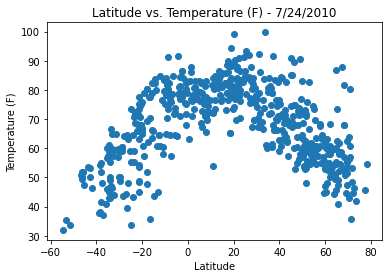

In [41]:
x_values = weather_data["Latitude"]
y_values = weather_data["Temperature (F)"]
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Temperature (F) - 7/24/2010")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("PyWeather Images/Latitude vs. Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

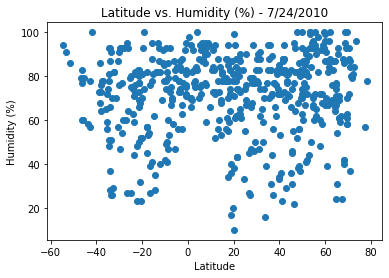

In [42]:
x_values = weather_data["Latitude"]
y_values = weather_data["Humidity (%)"]
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Humidity (%) - 7/24/2010")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("PyWeather Images/Latitude vs. Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

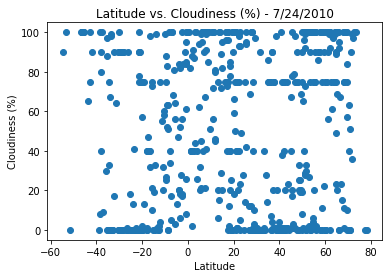

In [43]:
x_values = weather_data["Latitude"]
y_values = weather_data["Cloudiness (%)"]
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Cloudiness (%) - 7/24/2010")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("PyWeather Images/Latitude vs. Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

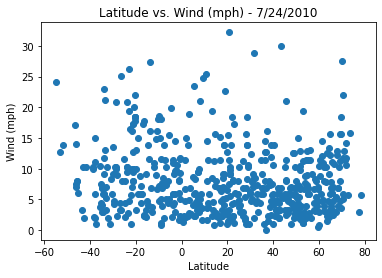

In [44]:
x_values = weather_data["Latitude"]
y_values = weather_data["Wind (mph)"]
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Wind (mph) - 7/24/2010")
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.savefig("PyWeather Images/Latitude vs. Wind Speed.png")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [40]:
# Create Northern and Southern Hemisphere DataFrames

northern_cities = weather_data["Latitude"]>0
southern_cities = weather_data["Latitude"]<0

northern_df = weather_data[northern_cities]
southern_df = weather_data[southern_cities]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49712626160487744


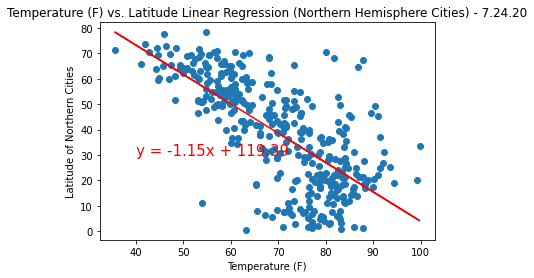

In [70]:
x_values = northern_df["Temperature (F)"]
y_values = northern_df["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude of Northern Cities")
plt.title("Temperature (F) vs. Latitude Linear Regression (Northern Hemisphere Cities) - 7.24.20")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.savefig("PyWeather Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5641065881913441


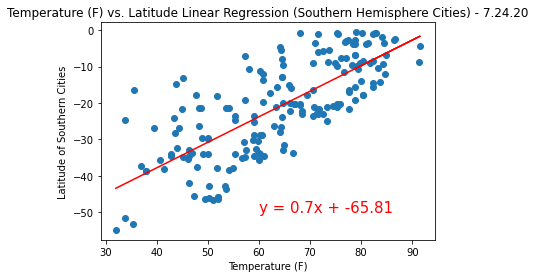

In [72]:
x_values = southern_df["Temperature (F)"]
y_values = southern_df["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude of Southern Cities")
plt.title("Temperature (F) vs. Latitude Linear Regression (Southern Hemisphere Cities) - 7.24.20")
plt.annotate(line_eq,(60,-50),fontsize=15,color="red")
plt.savefig("PyWeather Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00036546063711752704


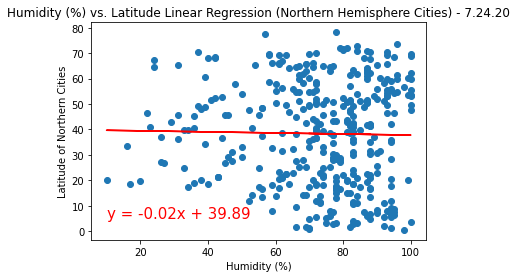

In [78]:
x_values = northern_df["Humidity (%)"]
y_values = northern_df["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude of Northern Cities")
plt.title("Humidity (%) vs. Latitude Linear Regression (Northern Hemisphere Cities) - 7.24.20")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.savefig("PyWeather Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0013273513394279994


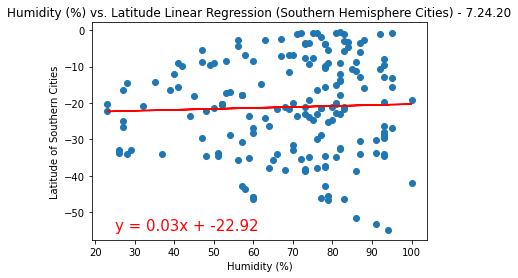

In [81]:
x_values = southern_df["Humidity (%)"]
y_values = southern_df["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude of Southern Cities")
plt.title("Humidity (%) vs. Latitude Linear Regression (Southern Hemisphere Cities) - 7.24.20")
plt.annotate(line_eq,(25,-55),fontsize=15,color="red")
plt.savefig("PyWeather Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0005216497042168336


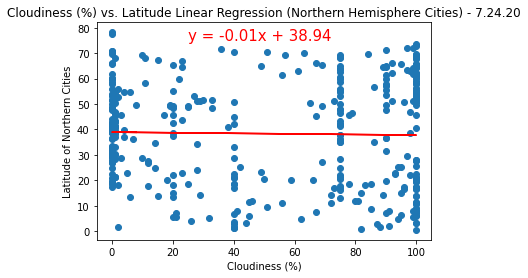

In [84]:
x_values = northern_df["Cloudiness (%)"]
y_values = northern_df["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude of Northern Cities")
plt.title("Cloudiness (%) vs. Latitude Linear Regression (Northern Hemisphere Cities) - 7.24.20")
plt.annotate(line_eq,(25,75),fontsize=15,color="red")
plt.savefig("PyWeather Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002407002342668651


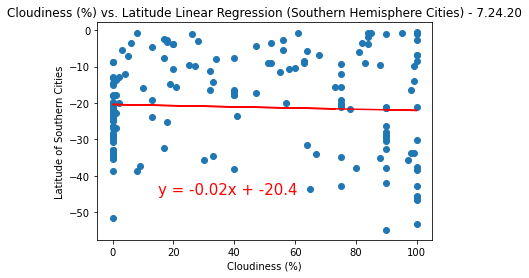

In [86]:
x_values = southern_df["Cloudiness (%)"]
y_values = southern_df["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude of Southern Cities")
plt.title("Cloudiness (%) vs. Latitude Linear Regression (Southern Hemisphere Cities) - 7.24.20")
plt.annotate(line_eq,(15,-45),fontsize=15,color="red")
plt.savefig("PyWeather Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0006399558210327981


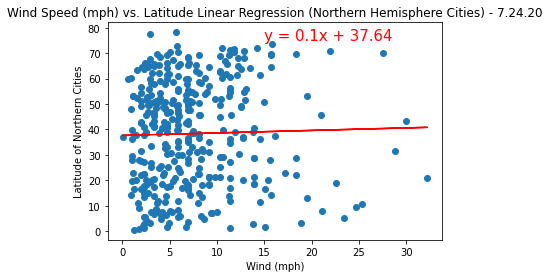

In [92]:
x_values = northern_df["Wind (mph)"]
y_values = northern_df["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Wind (mph)")
plt.ylabel("Latitude of Northern Cities")
plt.title("Wind Speed (mph) vs. Latitude Linear Regression (Northern Hemisphere Cities) - 7.24.20")
plt.annotate(line_eq,(15,75),fontsize=15,color="red")
plt.savefig("PyWeather Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001545414691150641


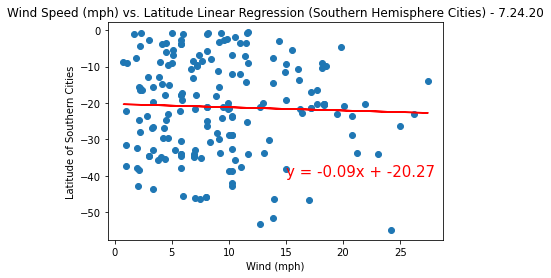

In [91]:
x_values = southern_df["Wind (mph)"]
y_values = southern_df["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Wind (mph)")
plt.ylabel("Latitude of Southern Cities")
plt.title("Wind Speed (mph) vs. Latitude Linear Regression (Southern Hemisphere Cities) - 7.24.20")
plt.annotate(line_eq,(15,-40),fontsize=15,color="red")
plt.savefig("PyWeather Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

I think it is safe to say there is a strong correlation between the line of latitude and temperature. The closer the city is to the equator, the warmer the temperature is going to be.

However, for humidity, cloudiness and windspeed, there is almost no correlation between these datasets and latitude, regardless of hemisphere. 